## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

### EDA (Exploratory Data Analysis)

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [4]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
38,4.4,3.0,1.3,0.2,0
107,7.3,2.9,6.3,1.8,2
45,4.8,3.0,1.4,0.3,0
18,5.7,3.8,1.7,0.3,0
58,6.6,2.9,4.6,1.3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

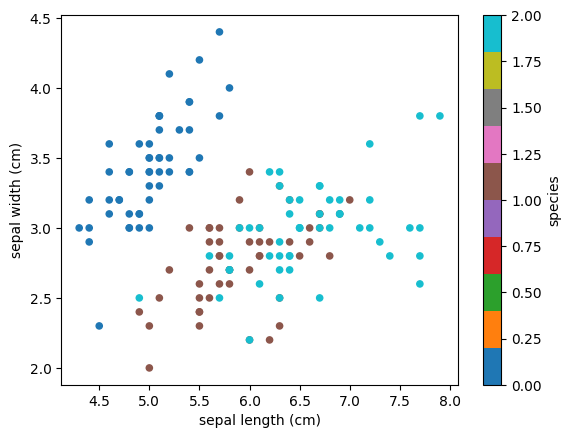

In [8]:
df.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', c='species', cmap='tab10')

# K-means

In [9]:
from sklearn.cluster import KMeans

k_values = []
intertia_scores = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(x)
    intertia_scores.append(model.inertia_)
    k_values.append(k)

module_of_second_derivative = np.abs(np.diff(np.diff(intertia_scores)))

/home/saifrehman/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/saifrehman/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/saifrehman/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/saifrehman/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/saifrehman

* We see that inertia is optimal at k=3, as there is a sharp decline in inertia from k=2 to k=3. 
* The model.inertia_ attribute will be the sum of squared distances between each data point and its nearest cluster center. 
* If we train another K-Means model with k=6 clusters, the model.inertia_ attribute will be the sum of squared distances between each data point and its nearest cluster center. 
* The model with k=3 clusters will have a lower inertia than the model with k=6 clusters, which means that the model with k=3 clusters is better able to cluster the data points.

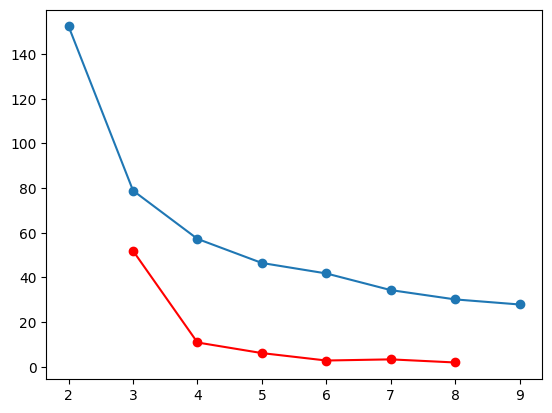

In [12]:
plt.plot(k_values, intertia_scores)
plt.scatter(k_values, intertia_scores)
plt.plot(k_values[1:-1], module_of_second_derivative, color='red')
plt.scatter(k_values[1:-1], module_of_second_derivative, color='red')
plt.show()

### Hyper-parametres

* n_clusters = The number of clusters to form as well as the number of centroids to generate.
* n_init = Number of times the k-means algorithm is run with different centroids 
* max_iter = Maximum number of iterations of the k-means algorithm for a single run.

In [19]:
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x)

all_predictions = model.predict(x)
centroids = model.cluster_centers_

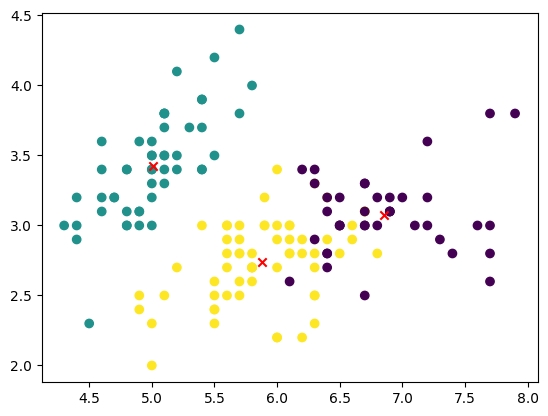

In [20]:

plt.scatter(x[:,0], x[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="red")
plt.show()

# K-means with PCA

In [22]:
from sklearn.decomposition import PCA

pca = PCA().fit(x)

Text(0, 0.5, 'cumulative explained variance')

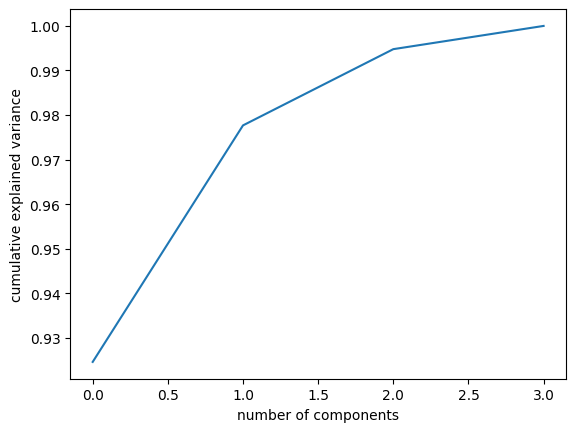

In [23]:
# Choosing value for n_components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plot shows that the first two principal components capture () of the variance in the data. Therefore, we can choose to keep two components.

In [26]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x_reduced)

centroids = model.cluster_centers_

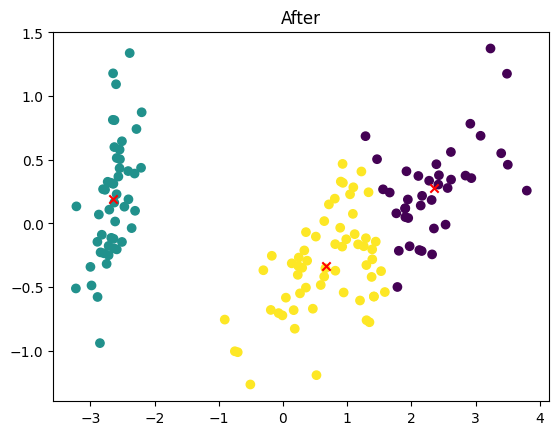

In [27]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="red")
plt.title('After')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score


# Create a KMeans model
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(iris.data)

# Predict the labels of the data
labels = kmeans.predict(iris.data)

# Calculate the accuracy score
accuracy_score_code1 = accuracy_score(iris.target, labels)

# Perform PCA
pca = PCA(n_components=2)

# Transform the data
pca_data = pca.fit_transform(iris.data)

# Create a KMeans model on the transformed data
kmeans_pca = KMeans(n_clusters=3)

# Fit the model to the transformed data
kmeans_pca.fit(pca_data)

# Predict the labels of the transformed data
labels_pca = kmeans_pca.predict(pca_data)

# Calculate the accuracy score
accuracy_score_code2 = accuracy_score(iris.target, labels_pca)

# Print the results
print('Accuracy score before PCA:', accuracy_score_code1)
print('Accuracy score after PCA:', accuracy_score_code2)